<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Convolutional Neural Networks
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022 University of Illinois Board of Trustees. All Rights Reserved.

# imports and graphics configurations

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from matplotlib.backends.backend_agg import FigureCanvasAgg

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
import scipy.signal

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['continuouscorrelation.png', 'firstcorrelation.png', 'flip.png', 'observed.png', 'observed_01.png', 'observed_02.png', 'observed_03.png', 'observed_04.png', 'observed_05.png', 'observed_06.png', 'observed_07.png', 'observed_08.png', 'observed_09.png', 'observed_10.png', 'observed_corr_01.png', 'observed_corr_02.png', 'observed_corr_03.png', 'observed_corr_04.png', 'observed_corr_05.png', 'observed_corr_06.png', 'observed_corr_07.png', 'observed_corr_08.png', 'observed_corr_09.png', 'observed_corr_10.png', 'observed_implicit_01.png', 'observed_implicit_02.png', 'observed_implicit_03.png', 'observed_implicit_04.png', 'observed_implicit_05.png', 'observed_implicit_06.png', 'observed_implicit_07.png', 'observed_implicit_08.png', 'observed_implicit_09.png', 'observed_implicit_10.png', 'reference.png', 'referencepair.png', 'ReLU.png', 'zeropad.png']
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

## configuration variables

In [ ]:
signal_length=25
N_trainingdata=100
N_trainingdata_visible=10
plot_color="blue"
ref_color="red"
SEED=0

# main

In [ ]:
R=pandas.Series([4,4.5,5,5.5,6,6,6])
R.index.name='n'
R

n
0    4.0
1    4.5
2    5.0
3    5.5
4    6.0
5    6.0
6    6.0
dtype: float64

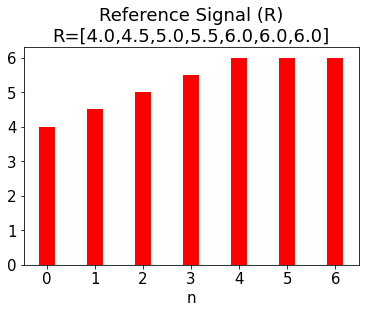

In [ ]:
plt.figure()
plt.bar(R.index,R.values,width=1/3,color=ref_color)
plt.xlabel("n")
title=[]
title.append("Reference Signal (R)")
title.append("R=["+",".join(['{:.1f}']*len(R)).format(*R.values)+"]")
plt.title("\n".join(title))
saver("reference")
plt.show()
plt.close()

In [ ]:
numpy.random.seed(SEED)
errorsize=0.3
trainingdata=pandas.DataFrame(scipy.stats.uniform.rvs(loc=0,scale=10,size=(signal_length,N_trainingdata)))
trainingdata.index=pandas.RangeIndex(start=0,stop=signal_length,name="n")

p=0.5
observations=range(1,N_trainingdata+1)

labels=scipy.stats.bernoulli.rvs(p=p,size=N_trainingdata).astype(numpy.bool)
labels[0]=True #force the first label for purposes of example

positions=numpy.random.randint(low=0,high=signal_length-len(R),size=N_trainingdata)
start=[(position if flag else None)  for (position,flag) in zip(positions,labels)]

trainingdata.columns=pandas.MultiIndex.from_tuples(zip(observations,labels,start), names=('observation','label','start'))

for ((observation,label,start),data) in trainingdata.iteritems():
    if label:
        trainingdata.loc[start+R.index,(observation,label,start)]=R.values+scipy.stats.norm.rvs(scale=errorsize,size=len(R))

trainingdata.iloc[:,:N_trainingdata_visible]

C:\Users\richa\AppData\Local\Temp/ipykernel_18124/1691622175.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=scipy.stats.bernoulli.rvs(p=p,size=N_trainingdata).astype(numpy.bool)


observation,1,2,3,4,5,6,7,8,9,10
label,True,False,True,True,True,False,False,False,False,True
start,7,NaN,5,11,4,NaN,NaN,NaN,NaN,16
n,,,,,,,,,,
0,5.488135,7.151894,6.027634,5.448832,4.236548,6.458941,4.375872,8.917730,9.636628,3.834415
1,6.778165,2.700080,7.351940,9.621885,2.487531,5.761573,5.920419,5.722519,2.230816,9.527490
2,3.117959,6.963435,3.777518,1.796037,0.246787,0.672496,6.793928,4.536968,5.365792,8.966713
3,9.065555,7.740473,3.331452,0.811014,4.072412,2.322341,1.324876,0.534272,7.255944,0.114275
4,4.012595,9.292914,0.996149,9.453015,4.252117,4.541624,3.267009,2.327441,6.144647,0.330746
5,3.103808,3.730349,3.930181,7.505950,4.580462,9.241588,8.623185,0.486903,2.536425,4.461355
6,1.746584,3.279880,4.325335,0.632076,5.014699,4.776465,2.840000,2.384133,5.145127,3.679276


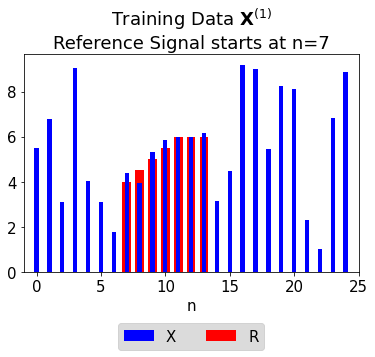

In [ ]:
temp=trainingdata.iloc[:,0]
index,label,start=temp.name
plt.figure()
plt.bar(temp.index,temp.values,width=1/3,color=plot_color,label="X")
plt.bar(start+R.index,R.values,width=2/3,color=ref_color,zorder=-4,label="R")
plt.xlabel("n")
plt.xlim(temp.index.min()-1,temp.index.max()+1)
title=[]
title.append(r"Training Data $\mathbf{{X}}^{{({0:n})}}$".format(index))
title.append("Reference Signal starts at n={0:}".format(start))
plt.title("\n".join(title))
legend("bottom")
saver("observed")
plt.show()
plt.close()

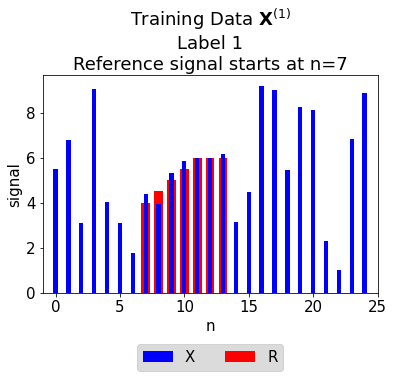

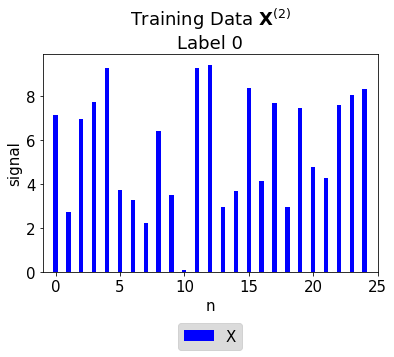

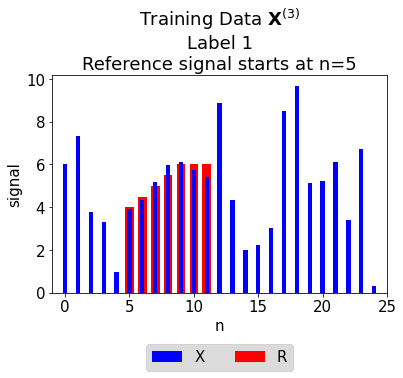

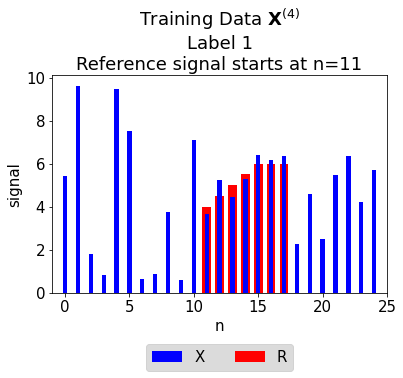

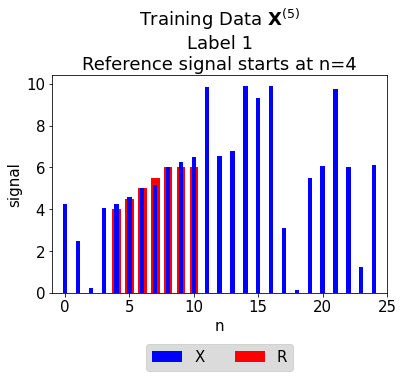

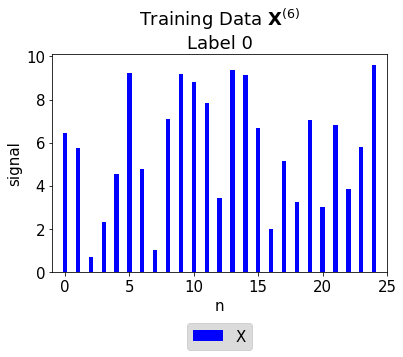

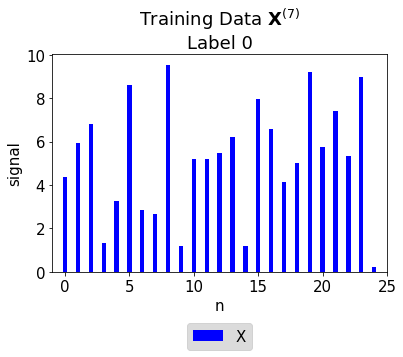

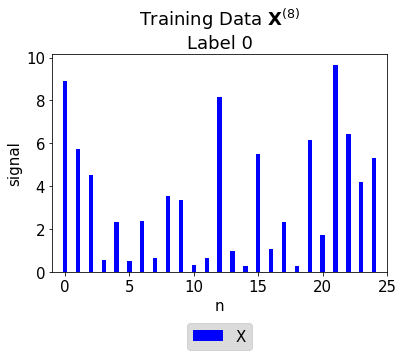

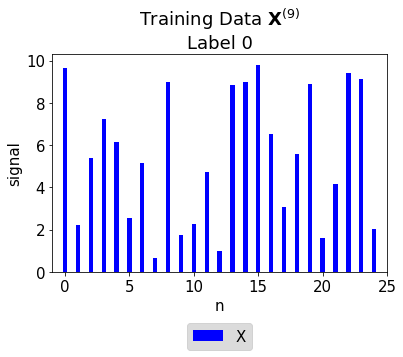

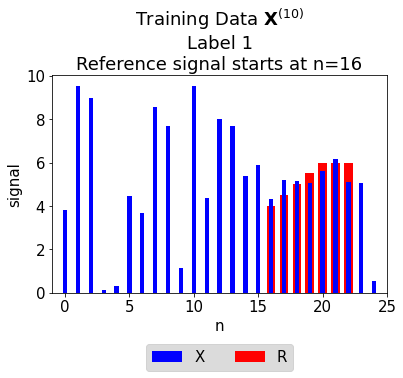

In [ ]:
for (index,label,start),f in list(trainingdata.iteritems())[:N_trainingdata_visible]:
    plt.figure()
    plt.bar(f.index,f.values,width=1/3,color=plot_color,label="X")
    if label:
        plt.bar(start+R.index,R.values,width=2/3,color=ref_color,zorder=-4,label="R")
    plt.xlabel("n")
    plt.ylabel("signal")

    plt.xlim(trainingdata.index.min()-1,trainingdata.index.max()+1)
    title=[]
    title.append(r"Training Data $\mathbf{{X}}^{{({0:n})}}$".format(index))
    title.append("Label {0:n}".format(label))
    if label:
        title.append("Reference signal starts at n={0:n}".format(start))
    plt.title("\n".join(title))
    legend("bottom")
    saver("observed_{0:02n}".format(index))
    plt.show()
    plt.close()

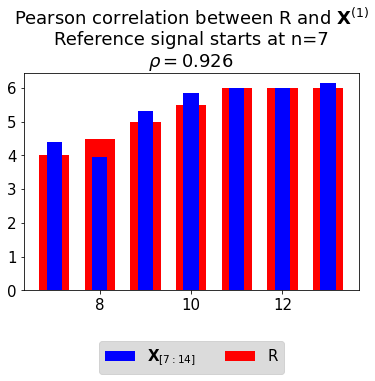

In [ ]:
first_observation=trainingdata.iloc[:,0]
index,_,start=first_observation.name
#print(first_observation)
plt.figure()
temp=first_observation.loc[start+R.index]
rho=numpy.corrcoef(R.values,temp.values)[0,1]
plt.bar(temp.index,temp.values,color="blue",label=r"$\mathbf{{X}}_{{[{0:n}:{1:n}]}}$".format(start,start+len(R)),width=1/3)

plt.bar(R.index+start,R.values,color="red",label="R".format(start,start+len(R)),width=2/3,zorder=-1)
#plt.xticks([],[])

title=[]
title.append(r"Pearson correlation between R and $\mathbf{{X}}^{{({0:n})}}$".format(index))
title.append("Reference signal starts at n={0:n}".format(start))
title.append(r"$\rho={{{0:.3f}}}$".format(rho))
plt.title("\n".join(title))

legend("bottom")
saver("firstcorrelation")
plt.show()
plt.close()

In [ ]:
correlations=pandas.DataFrame(numpy.nan,index=trainingdata.index,columns=trainingdata.columns)
maxn=len(trainingdata)-len(R)
for key,signal in trainingdata.iteritems():
    temp=[numpy.corrcoef(R.values,signal.loc[n+R.index])[0,1] for n in trainingdata.index[0:maxn]]
    correlations[key][0:maxn]=temp

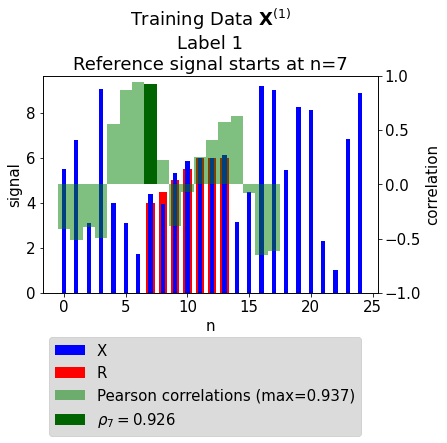

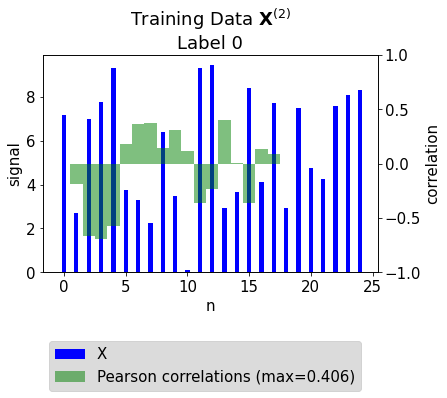

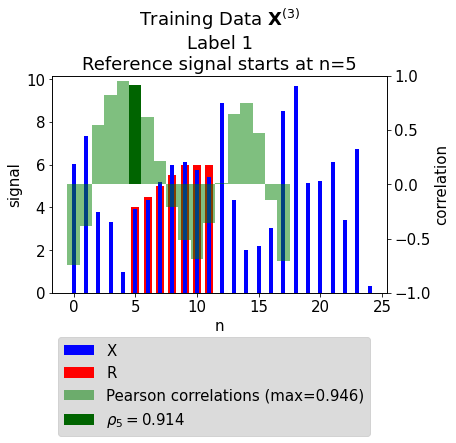

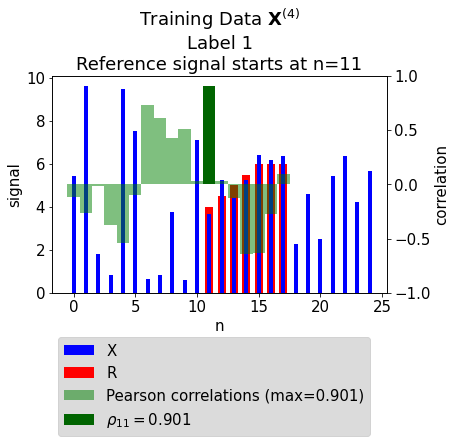

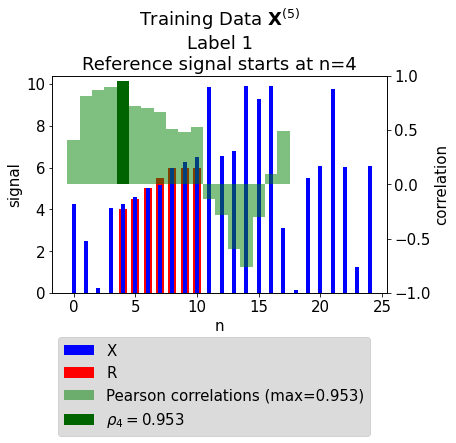

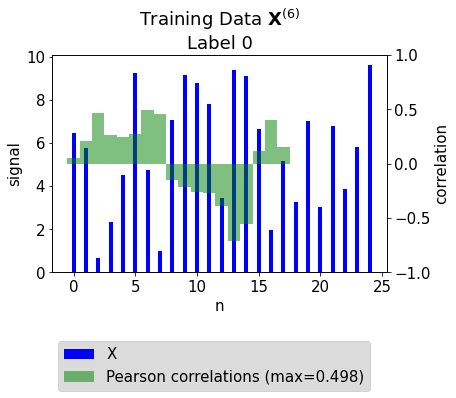

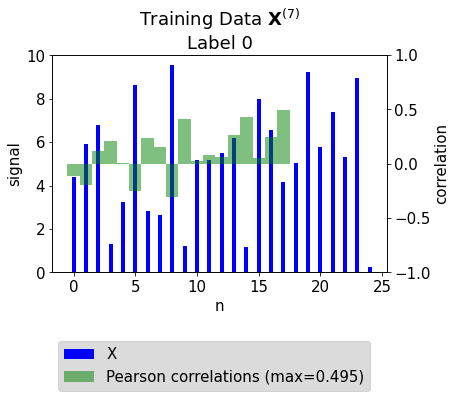

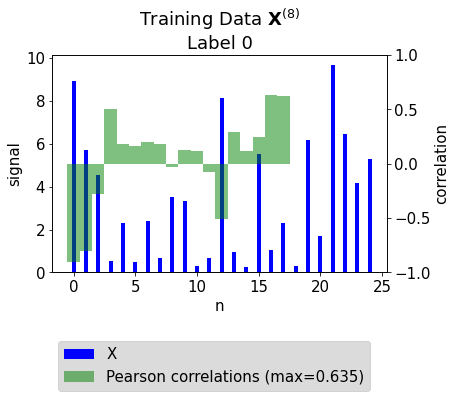

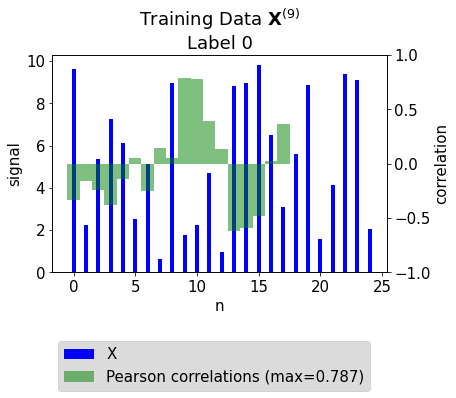

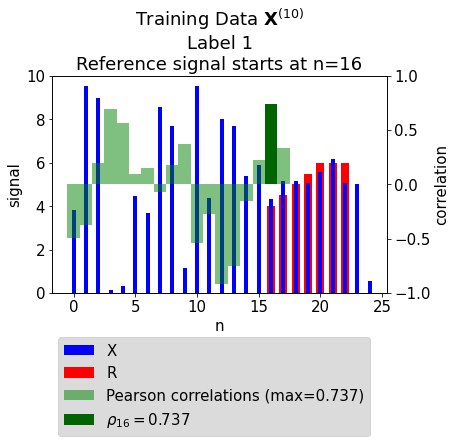

In [ ]:
for (index,label,start),f in list(trainingdata.iteritems())[:N_trainingdata_visible]:
    c=correlations[(index,label,start)]
    fig=plt.figure()
    plt.bar(f.index,f.values,width=1/3,color=plot_color,label="X")
    if label:
        plt.bar(start+R.index,R.values,width=2/3,color=ref_color,zorder=-4,label="R")
    plt.xlabel("n")
    plt.ylabel("signal")

    newax=plt.gca().twinx()
    plt.bar(c.index,c.values,width=1,color="green",label="Pearson correlations (max={0:.3f})".format(c.max()),alpha=0.5)
    if label:
        plt.bar(start,c[start],color="darkgreen",width=1,label=r"$\rho_{{{0:n}}}={{{1:.3f}}}$".format(start,c[start]))
    plt.ylim(-1,1)
    plt.ylabel("correlation")
    #newax.set_zorder(1)

    title=[]
    title.append(r"Training Data $\mathbf{{X}}^{{({0:n})}}$".format(index))
    title.append("Label {0:n}".format(label))
    if label:
        title.append("Reference signal starts at n={0:n}".format(start))
    plt.title("\n".join(title))
    #fig.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1,borderaxespad=0)
    fig.legend(bbox_to_anchor=(0.5,-0.2), loc='center',facecolor="lightgray",ncol=1,borderaxespad=0)
    saver("observed_corr_{0:02n}".format(index))
    plt.show()
    plt.close()

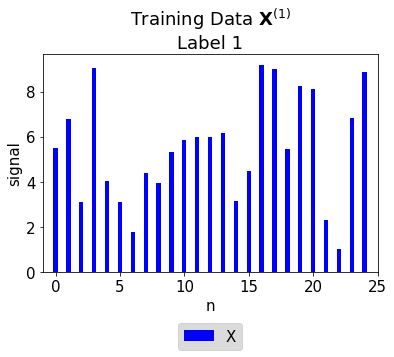

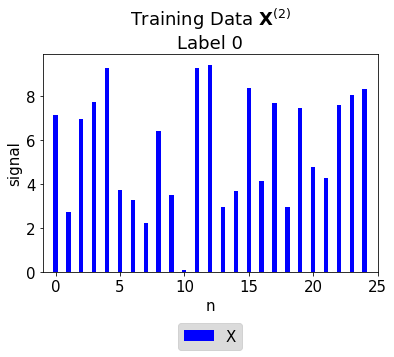

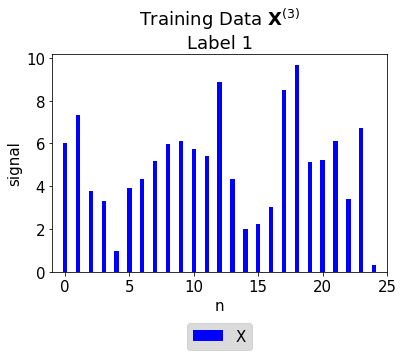

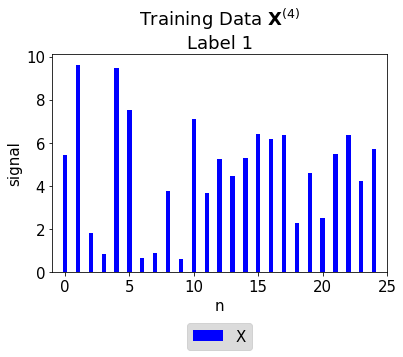

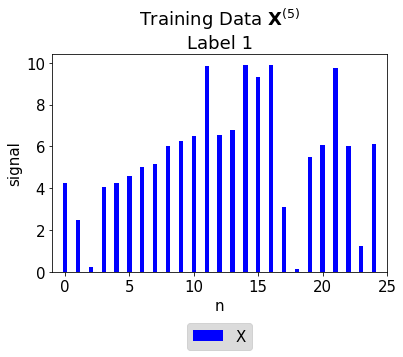

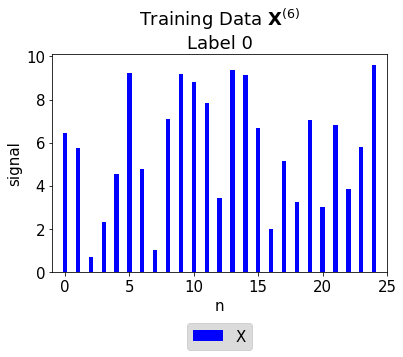

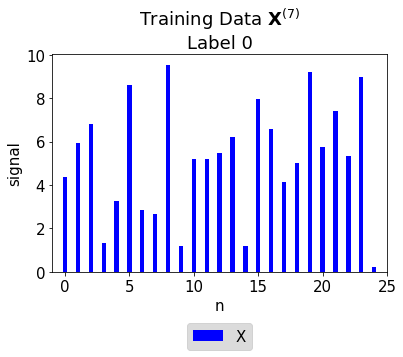

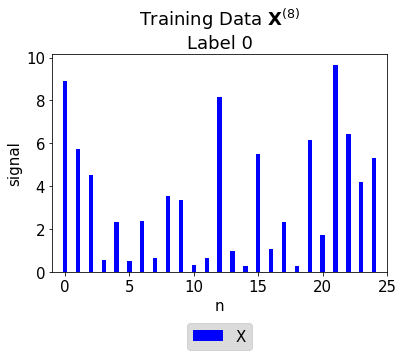

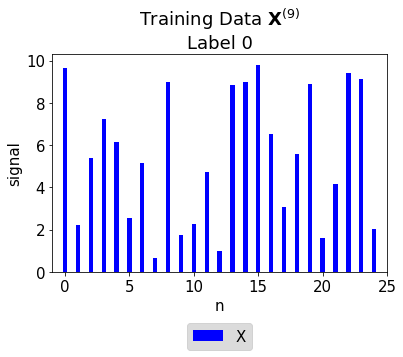

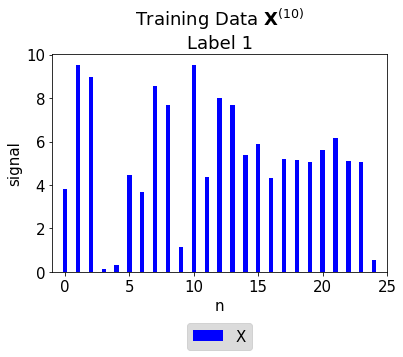

In [ ]:
for (index,label,_),f in list(trainingdata.iteritems())[:N_trainingdata_visible]:
    plt.figure()
    plt.bar(f.index,f.values,width=1/3,color=plot_color,label="X")
    plt.xlabel("n")
    plt.ylabel("signal")

    plt.xlim(trainingdata.index.min()-1,trainingdata.index.max()+1)
    title=[]
    title.append(r"Training Data $\mathbf{{X}}^{{({0:n})}}$".format(index))
    title.append("Label {0:n}".format(label))
    plt.title("\n".join(title))
    legend("bottom")
    saver("observed_implicit_{0:02n}".format(index))
    plt.show()
    plt.close()

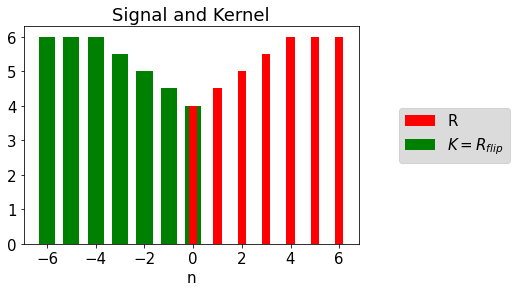

In [ ]:
plt.figure()
plt.bar(R.index,R.values,width=1/3,color=ref_color,zorder=2,label="R")
plt.bar(-numpy.flip(R.index),numpy.flip(R.values),width=2/3,color="green",label=r"$K=R_{flip}$")
plt.xlabel("n")
title=[]
title.append("Signal and Kernel")
#title.append(str(R.values))
plt.title("\n".join(title))
legend("side")
saver("flip")
plt.show()
plt.close()

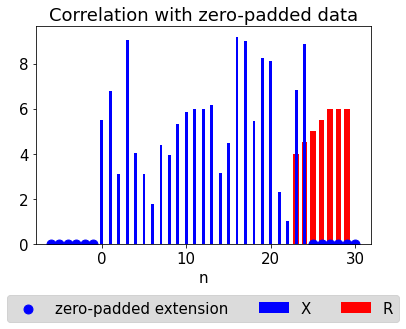

In [ ]:
temp=trainingdata.iloc[:,0]
plt.figure()
maxn=temp.index.max()
N_new=6
backshift=1
plt.bar(temp.index,temp.values,width=1/3,color=plot_color,label="X")
newindices=list(range(maxn+1,maxn+N_new+1))
plt.scatter(newindices,[0]*N_new,s=80,color=plot_color,label="zero-padded extension")
newindices=list(range(-N_new,0))
plt.scatter(newindices,[0]*N_new,s=80,color=plot_color)
plt.bar(R.index+maxn-backshift,R.values,color=ref_color,width=2/3,label="R",zorder=-2)
plt.xlabel("n")
title=[]
title.append("Correlation with zero-padded data")
plt.title("\n".join(title))
legend("bottom")
saver("zeropad")
plt.show()
plt.close()

In [ ]:
class CNN:
    def __init__(self,trainingdata,ReLU=False):
        self.ReLU=ReLU
        self.trainingdata=trainingdata


    def setstate(self,pattern,m,b):
        self.pattern=numpy.array(pattern,dtype=numpy.float)
        self.b=b
        self.m=m


    def setlearningrate(self,learningrate):
        self.learningrate=learningrate

    @staticmethod
    def BCE(label,z):
        if label:
            return numpy.log(1+numpy.exp(-z))
        else:
            return numpy.log(1+numpy.exp(z))

    @staticmethod
    def dBCE(label,z):
        if label:
            return -1/(1+numpy.exp(z))
        else:
            return 1/(1+numpy.exp(-z))

    @staticmethod
    def quantize(x):
        return (x>0.5).astype('int')

    def Loss(self,state=None):
        if state is None:
            (pattern,bias)=(self.pattern,self.bias)
        else:
            (pattern,bias)=state

        entropies=[]
        for (feature,label) in self.trainingdata:
            convolution=numpy.correlate(feature,pattern)
            z=numpy.max(convolution)
            h=self.BCE(label,m*z+b)
            entropies.append(h)
        return numpy.mean(entropies)


    def LossGradient(self):
        patterngradients=[]
        mgradients=[]
        bgradients=[]
        for (idx,label,start),datum in self.trainingdata.iteritems():
            convolution=numpy.correlate(datum.values,self.pattern)
            z=numpy.max(convolution)
            n=numpy.argmax(convolution)
            dpattern=datum[n:(n+len(self.pattern))]
            if (self.ReLU and (z<0)):
                dpattern*=0
                z*=0
            prefactor=self.dBCE(label,z)
            (patterngradient,mgradient,bgradient)=(prefactor*self.m*dpattern,prefactor*z,prefactor)
            patterngradients.append(patterngradient)
            mgradients.append(mgradient)
            bgradients.append(bgradient)

        return (numpy.mean(numpy.array(patterngradients),axis=0),numpy.mean(mgradients),numpy.mean(bgradients))

    def update(self):
        (self.dpattern,self.dm,self.db)=self.LossGradient()
        #self.dpattern-=self.dpattern.mean()
        self.pattern-=self.learningrate*self.dpattern
        self.dm-=self.learningrate*self.dm
        #self.pattern=self.pattern-self.pattern.mean()
        self.b-=self.learningrate*self.db
        return (self.pattern,self.m,self.b)

#temp=[(X.values,label) for ((_,label),X) in trainingdata.iteritems()]
myCNN=CNN(trainingdata,ReLU=True)
initialarray=numpy.array([4,3,4,5.5,6,6,6])
myCNN.setstate(0.5*(initialarray-initialarray.mean()),0.3,.1)
myCNN.learningrate=0.1
MAX_iter=1000
correlation_array=[]
for ctr in range(MAX_iter):
    myCNN.update()
    corr=numpy.corrcoef(R.values,myCNN.pattern)[0,1]
    correlation_array.append(corr)
    if ((ctr%int(MAX_iter/20)==0) or ctr==(MAX_iter-1)):
        print("ctr={0:n}; correlation of pattern with R={1:.5f}".format(ctr,corr))
        #print("ctr=",ctr,"; pattern=",myCNN.pattern)
        #print("    dpattern=",-myCNN.dpattern)
        #temp=numpy.corrcoef(R.values,myCNN.pattern)[0,1]
        #print("    correlation with R: ",temp)

print("DONE: pattern:",myCNN.pattern)

C:\Users\richa\AppData\Local\Temp/ipykernel_18124/2216878531.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.pattern=numpy.array(pattern,dtype=numpy.float)


ctr=0; correlation of pattern with R=0.89749
ctr=50; correlation of pattern with R=0.86646
ctr=100; correlation of pattern with R=0.86702
ctr=150; correlation of pattern with R=0.86727
ctr=200; correlation of pattern with R=0.86746
ctr=250; correlation of pattern with R=0.86758
ctr=300; correlation of pattern with R=0.86769
ctr=350; correlation of pattern with R=0.86776
ctr=400; correlation of pattern with R=0.86779
ctr=450; correlation of pattern with R=0.86789
ctr=500; correlation of pattern with R=0.86803
ctr=550; correlation of pattern with R=0.86812
ctr=600; correlation of pattern with R=0.86810
ctr=650; correlation of pattern with R=0.86815
ctr=700; correlation of pattern with R=0.86828
ctr=750; correlation of pattern with R=0.86830
ctr=800; correlation of pattern with R=0.86836
ctr=850; correlation of pattern with R=0.86831
ctr=900; correlation of pattern with R=0.86833
ctr=950; correlation of pattern with R=0.86834
ctr=999; correlation of pattern with R=0.86835
DONE: pattern: [

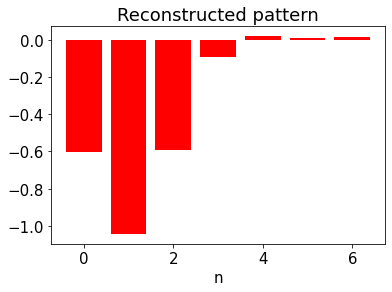

In [ ]:
plt.figure()
plt.bar(range(len(myCNN.pattern)),myCNN.pattern,color="red")
title=[]
title.append("Reconstructed pattern")
plt.title("\n".join(title))
plt.xlabel("n")
plt.show()
plt.close()

(1, True, 7)


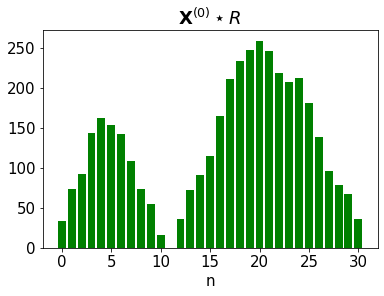

In [ ]:
index=0
XRcorrelation=numpy.correlate(trainingdata.iloc[:,index],R.values,mode='full')
print(trainingdata.columns[index])
plt.figure()
plt.bar(range(len(XRcorrelation)),XRcorrelation,color="green")
title=[]
title.append(r"$\mathbf{{X}}^{{({0:n})}}\star R$".format(index))
plt.title("\n".join(title))
plt.xlabel("n")
saver("continuouscorrelation")
plt.show()
plt.close()

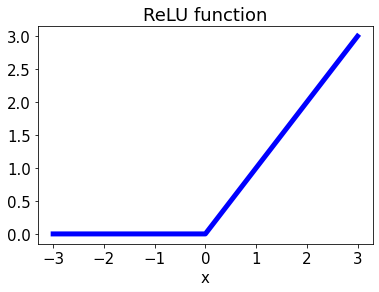

In [ ]:
plt.figure()
plt.plot([-3,0,3],[0,0,3],color="blue")
title=[]
title.append("ReLU function")
plt.title("\n".join(title))
plt.xlabel("x")
saver("ReLU")
plt.show()
plt.close()

In [ ]:
RR=R.to_frame()
RR.loc[:,1]=[1,3,5,7,7,7,7]
RR.columns=["channel 0","channel 1"]
RR

,channel 0,channel 1
n,,
0,4.0,1
1,4.5,3
2,5.0,5
3,5.5,7
4,6.0,7
5,6.0,7
6,6.0,7


In [ ]:
RR.to_latex(buf="RR.tex",bold_rows=True)

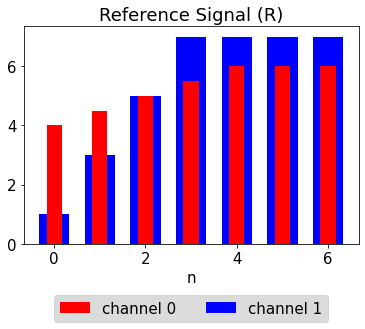

In [ ]:
plt.figure()
plt.bar(RR.index,RR.iloc[:,0],width=1/3,color=ref_color,label="channel 0")
plt.bar(RR.index,RR.iloc[:,1],width=2/3,color="blue",zorder=-1,label="channel 1")
plt.xlabel("n")
title=[]
title.append("Reference Signal (R)")
plt.title("\n".join(title))
legend("bottom")
saver("referencepair")
plt.show()
plt.close()